# Titanic competiton - binary classification

My solution with Gradient Boosting Classfier to achieve top 20% at most famous Kaggle ML competition

More details below:
[Titanic: Machine learing from disaster](https://www.kaggle.com/c/titanic)

Let's start!

In [3]:
# import needed libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

## 1. Data sets understanding

In [5]:
# data frames dimentions, test and train set
train = pd.DataFrame(train)
test = pd.DataFrame(test)
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [6]:
# samples of train set
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
#samples of test set
test.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,1150,2,"Bentham, Miss. Lilian W",female,19.0,0,0,28404,13.0000,NaN,S
99,991,3,"Nancarrow, Mr. William Henry",male,33.0,0,0,A./5. 3338,8.0500,NaN,S
118,1010,1,"Beattie, Mr. Thomson",male,36.0,0,0,13050,75.2417,C6,C
282,1174,3,"Fleming, Miss. Honora",female,NaN,0,0,364859,7.7500,NaN,Q
292,1184,3,"Nasr, Mr. Mustafa",male,NaN,0,0,2652,7.2292,NaN,C


In [8]:
# types of data
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
# data description
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [11]:
# Data Frame with null value information
nulls_summary = pd.DataFrame(train.isnull().any(), columns=['Nulls'])
nulls_summary['Num_of_nulls [qty]'] = pd.DataFrame(train.isnull().sum())
nulls_summary['Num_of_nulls [%]'] = round((train.isnull().mean()*100),2)
nulls_summary

,Nulls,Num_of_nulls [qty],Num_of_nulls [%]
PassengerId,False,0,0.00
Survived,False,0,0.00
Pclass,False,0,0.00
Name,False,0,0.00
Sex,False,0,0.00
Age,True,177,19.87
SibSp,False,0,0.00
Parch,False,0,0.00
Ticket,False,0,0.00
Fare,False,0,0.00


In [12]:
# Data Frame with null value information
nulls_summary = pd.DataFrame(test.isnull().any(), columns=['Nulls'])
nulls_summary['Num_of_nulls [qty]'] = pd.DataFrame(test.isnull().sum())
nulls_summary['Num_of_nulls [%]'] = round((test.isnull().mean()*100),2)
nulls_summary

,Nulls,Num_of_nulls [qty],Num_of_nulls [%]
PassengerId,False,0,0.00
Pclass,False,0,0.00
Name,False,0,0.00
Sex,False,0,0.00
Age,True,86,20.57
SibSp,False,0,0.00
Parch,False,0,0.00
Ticket,False,0,0.00
Fare,True,1,0.24
Cabin,True,327,78.23


In [13]:
# outliers
q1 = train.quantile(0.25)
q3 = train.quantile(0.75)
iqr = q3-q1

low_boundary = q1-1.5*iqr
upp_boundary = q3+1.5*iqr
num_of_out_L = (train[iqr.index] < low_boundary).sum()
num_of_out_U = (train[iqr.index] > upp_boundary).sum()

outliers = pd.DataFrame({"lower_value":low_boundary, "upper_boundary":upp_boundary,
                        "num_of_outliers_L":num_of_out_L, "num_of_outliers_U":num_of_out_U})
outliers

,lower_value,upper_boundary,num_of_outliers_L,num_of_outliers_U
PassengerId,-444.0000,1336.0000,0,0
Survived,-1.5000,2.5000,0,0
Pclass,0.5000,4.5000,0,0
Age,-6.6875,64.8125,0,11
SibSp,-1.5000,2.5000,0,46
Parch,0.0000,0.0000,0,213
Fare,-26.7240,65.6344,0,116


In [15]:
# categoral variables
for col in train.select_dtypes(["object", "category"]).drop("Name", axis=1):
    print(train[col].value_counts())

male      577
female    314
Name: Sex, dtype: int64
CA. 2343             7
1601                 7
347082               7
347088               6
3101295              6
CA 2144              6
382652               5
S.O.C. 14879         5
2666                 4
PC 17757             4
17421                4
W./C. 6608           4
LINE                 4
19950                4
4133                 4
349909               4
347077               4
113760               4
113781               4
PC 17760             3
F.C.C. 13529         3
110152               3
35273                3
239853               3
24160                3
SC/Paris 2123        3
248727               3
13502                3
345773               3
PC 17582             3
                    ..
350043               1
36864                1
PC 17754             1
347466               1
11755                1
SOTON/O.Q. 392078    1
A.5. 18509           1
CA. 2314             1
349245               1
PC 17610             1
33093

In [16]:
train.select_dtypes(["float","int",'int64']).columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [17]:
# correlaction between numeric features

pd.DataFrame(np.corrcoef(train.fillna(0).select_dtypes(['float', 'float64', 'int', 'int64']), rowvar=0), 
             columns=train.select_dtypes(["float", 'float64', "int", 'int64']).columns,
             index=train.select_dtypes(["float", 'float64', "int", 'int64']).columns)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.038125,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,0.010539,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.361353,0.083081,0.018443,-0.549500
Age,0.038125,0.010539,-0.361353,1.000000,-0.184664,-0.048786,0.135516
SibSp,-0.057527,-0.035322,0.083081,-0.184664,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.048786,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.135516,0.159651,0.216225,1.000000


In [18]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1. Data analysis and manipulation

In [19]:
# dropping Cabin due to many missing values and Ticket as I will not use it anymore
train.drop(labels=["Ticket", "Cabin"], inplace=True, axis=1)

In [20]:
# dropping at test set
test.drop(labels=["Ticket", "Cabin"], inplace=True, axis=1)

In [21]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [22]:
# extracting Titles from Name column
train["Title"] = train["Name"].apply(lambda x: x[x.find(",")+2:][:x[x.find(",")+2:].find(".")])

In [23]:
train["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [24]:
test["Title"] = test["Name"].apply(lambda x: x[x.find(",")+2:][:x[x.find(",")+2:].find(".")])
test["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [25]:
# check average age for each Title
pd.concat([pd.crosstab(train["Title"], train["Sex"]), train.groupby("Title").mean()[["Age"]]], axis=1).sort_values(by="Age")

,female,male,Age
Title,,,
Master,0,40,4.574167
Miss,182,0,21.773973
Mme,1,0,24.000000
Mlle,2,0,24.000000
Ms,1,0,28.000000
Mr,0,517,32.368090
the Countess,1,0,33.000000
Mrs,125,0,35.898148
Jonkheer,0,1,38.000000


In [26]:
pd.concat([pd.crosstab(test["Title"], test["Sex"]), test.groupby("Title").mean()[["Age"]]], axis=1).sort_values(by="Age")

,female,male,Age
Title,,,
Master,0,21,7.406471
Miss,78,0,21.774844
Mr,0,240,32.000000
Rev,0,2,35.500000
Mrs,72,0,38.903226
Dona,1,0,39.000000
Col,0,2,50.000000
Dr,0,1,53.000000
Ms,1,0,NaN


In [27]:
# reducing numbers of titles based on average age

train.replace(["Mme", "Mlle"], "Ms", inplace=True)
train.replace("Major", "Sir", inplace=True)
train.replace("Jonkheer", "Don", inplace=True)
train.replace("Dona", "Mrs", inplace=True)

pd.crosstab(train["Title"], train["Sex"])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Don,0,2
Dr,1,6
Lady,1,0
Master,0,40
Miss,182,0
Mr,0,517
Mrs,125,0


In [28]:
test.replace(["Mme", "Mlle"], "Ms", inplace=True)
test.replace("Major", "Sir", inplace=True)
test.replace("Jonkheer", "Don", inplace=True)
test.replace("Dona", "Mrs", inplace=True)

pd.crosstab(test["Title"], test["Sex"])

Sex,female,male
Title,,
Col,0,2
Dr,0,1
Master,0,21
Miss,78,0
Mr,0,240
Mrs,73,0
Ms,1,0
Rev,0,2


In [29]:
# name column will not be needed anymore
train = train.drop("Name", axis=1)

In [30]:
test = test.drop("Name", axis=1)

C:\Users\Karolina\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


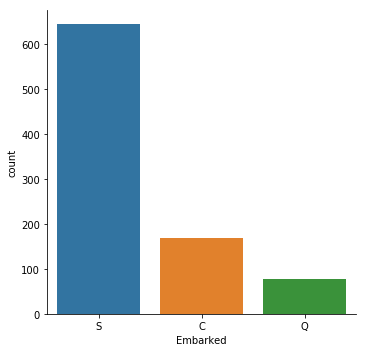

In [31]:
# Visualization
sns.factorplot("Embarked", data=train, kind="count")

In [32]:
# 2 missing values are filled in with "S" as most of samples 
train.loc[train["Embarked"].isnull(), "Embarked"] = "S"

In [33]:
# mean value of Fare assigned to Fare missing valuein test set
test.loc[test["Fare"].isnull(), "Fare"] = train["Fare"].mean()

In [34]:
# wherever Age is not known, average value of same title is assigned
titles = train["Title"].unique()
for t in titles:
    train.loc[(train["Age"].isnull()) & (train["Title"]==t), "Age"] = round(train[train["Title"]==t]["Age"].mean(),0)
    test.loc[(test["Age"].isnull()) & (test["Title"]==t), "Age"] = round(test[test["Title"]==t]["Age"].mean(),0)

In [35]:
# As there is no Ms in test set, value will be assigned based on train set
test.loc[(test["Age"].isnull()) & (test["Title"]=="Ms"), "Age"] = round(train[train["Title"]=="Ms"]["Age"].mean(),0)

In [36]:
# Age lower than 1 will be rounded up
for df in [train, test]:
    df.loc[df["Age"]<1, "Age"] = 1

In [37]:
# no value check - train set
test.isnull().any()

PassengerId    False
Pclass         False
Sex            False
Age            False
SibSp          False
Parch          False
Fare           False
Embarked       False
Title          False
dtype: bool

In [38]:
# no value check - test set
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Sex            False
Age            False
SibSp          False
Parch          False
Fare           False
Embarked       False
Title          False
dtype: bool

In [39]:
# Each class has min fare equal to zero, free ride?
pd.DataFrame([train[train["Pclass"]==3].describe()["Fare"],
              train[train["Pclass"]==2].describe()["Fare"],
              train[train["Pclass"]==1].describe()["Fare"]],
            index=["class3", "class2", "class1"]).transpose()

,class3,class2,class1
count,491.000000,184.000000,216.000000
mean,13.675550,20.662183,84.154687
std,11.778142,13.417399,78.380373
min,0.000000,0.000000,0.000000
25%,7.750000,13.000000,30.923950
50%,8.050000,14.250000,60.287500
75%,15.500000,26.000000,93.500000
max,69.550000,73.500000,512.329200


In [40]:
# There are only few zeros in each class and some outliers as 5 in Class1, 
# they will be repalced with one of the lowest existing in each class
pd.DataFrame((train[train["Pclass"]==1]["Fare"].sort_values()[:10].reset_index(drop=True),
              train[train["Pclass"]==2]["Fare"].sort_values()[:10].reset_index(drop=True),
              train[train["Pclass"]==3]["Fare"].sort_values()[:10].reset_index(drop=True)),
              index = ["Class 1", "Class 2", "Class 3"]).transpose()

,Class 1,Class 2,Class 3
0,0.0000,0.0,0.0000
1,0.0000,0.0,0.0000
2,0.0000,0.0,0.0000
3,0.0000,0.0,0.0000
4,0.0000,0.0,4.0125
5,5.0000,0.0,6.2375
6,25.5875,10.5,6.4375
7,25.9250,10.5,6.4500
8,25.9292,10.5,6.4958
9,25.9292,10.5,6.4958


In [41]:
# replace low quantities with below numbers
for df in [train, test]:
    df.loc[(df["Pclass"]==3) & (df["Fare"]<6), "Fare"] = 6.45
    df.loc[(df["Pclass"]==2) & (df["Fare"]<10), "Fare"] = 10.5
    df.loc[(df["Pclass"]==1) & (df["Fare"]<25), "Fare"] = 26.0

In [42]:
# new feature combining number of siblings and parents/children
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

C:\Users\Karolina\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


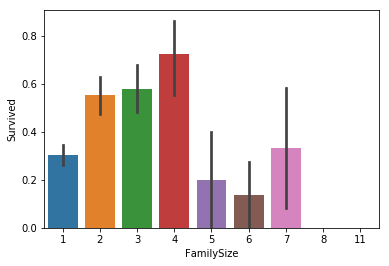

In [43]:
sns.barplot("FamilySize", "Survived", data=train)

In [44]:
# bins with possibility of surviving based on familiy size
train["FamliyBin"] = train["FamilySize"].apply(lambda x: "high" if x in [2,3,4] else ("mid" if x in [1,5,6,7] else "zero"))
test["FamliyBin"] = test["FamilySize"].apply(lambda x: "high" if x in [2,3,4] else ("mid" if x in [1,5,6,7] else "zero"))

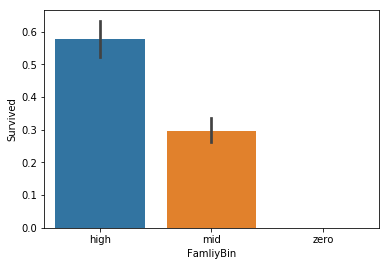

In [45]:
sns.barplot("FamliyBin", "Survived", data=train)

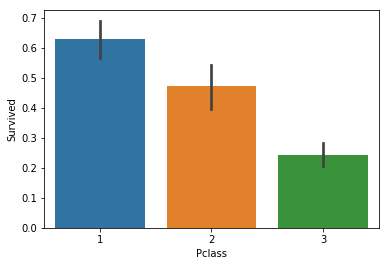

In [46]:
sns.barplot("Pclass", "Survived", data=train)

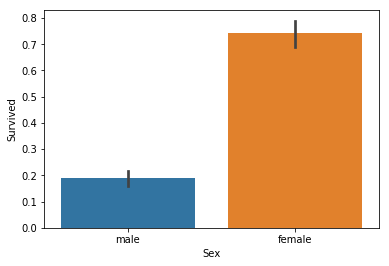

In [47]:
sns.barplot("Sex", "Survived", data=train)

In [48]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked', 'Title', 'FamilySize', 'FamliyBin'],
      dtype='object')

C:\Users\Karolina\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


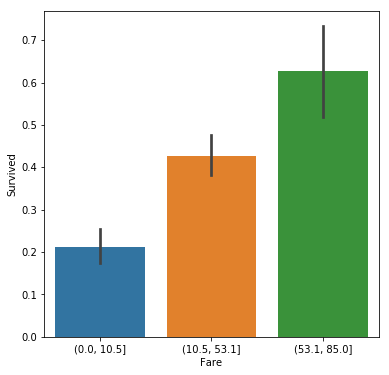

In [49]:
# 
bins = [0, 10.5, 53.1, 85]

plt.figure(figsize=(6, 6))
sns.barplot(pd.cut(train["Fare"], bins=bins), "Survived", data=train)

C:\Users\Karolina\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

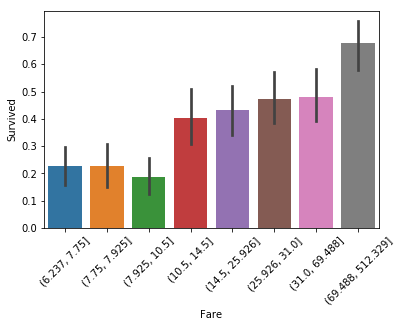

In [50]:
sns.barplot(pd.qcut(train["Fare"], 8), "Survived", data=train)
plt.xticks(rotation=45)

In [51]:
# bins for Fares
bins_l = sorted([x.left for x in pd.qcut(train["Fare"], 8).unique()])
bins_r = sorted([x.right for x in pd.qcut(train["Fare"], 8).unique()])

means = [train[(train["Fare"]>fare_l) & (train["Fare"]<=fare_h)]["Fare"].mean() for fare_l, fare_h in zip(bins_l, bins_r)]

def fare_assign(fare):
    for i in range(len(bins_l)):
        if bins_l[i] < fare-0.0003 <= bins_r[i]:
            return means[i]

train["FareBin"] = train["Fare"].apply(fare_assign)
test["FareBin"] = test["Fare"].apply(fare_assign)

In [52]:
test.isnull().any()

PassengerId    False
Pclass         False
Sex            False
Age            False
SibSp          False
Parch          False
Fare           False
Embarked       False
Title          False
FamilySize     False
FamliyBin      False
FareBin        False
dtype: bool

C:\Users\Karolina\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

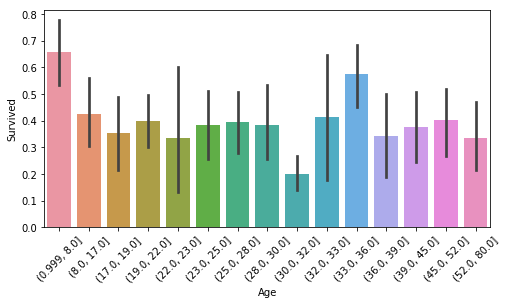

In [53]:
age_cut = pd.qcut(train["Age"], 16, duplicates="drop")

plt.figure(figsize=(8, 4))
sns.barplot(age_cut, "Survived", data=train)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

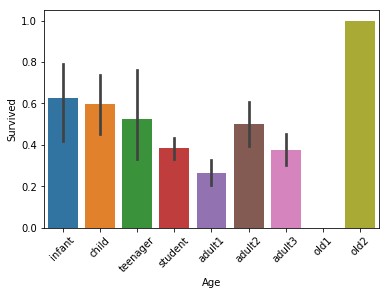

In [54]:
# bins for Age
bins_age = [0, 2, 9, 15, 30, 35, 40, 65, 75, 80]
labels = ["infant", "child", "teenager", "student", "adult1", "adult2", "adult3", "old1", "old2"]
cut_age = pd.cut(train["Age"], bins_age, labels=labels)

sns.barplot(cut_age, "Survived", data=train)
plt.xticks(rotation=45)

In [55]:
def age_bin(age):
    if 0 < age <= 2:
        return "infant"
    elif 2 < age <= 9:
        return "child"
    elif 9 < age <= 15:
        return "teenager"
    elif 15 < age <= 30:
        return "student"
    elif 30 < age <= 35:
        return "adult1"
    elif 35 < age <= 40:
        return "adult2"
    elif 40 < age <= 65:
        return "adult3"
    elif 65 < age <= 75:
        return "old1"
    else:
        return "old2"


train["AgeBin"] = train["Age"].apply(age_bin)
test["AgeBin"] = test["Age"].apply(age_bin)

In [56]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked', 'Title', 'FamilySize', 'FamliyBin', 'FareBin',
       'AgeBin'],
      dtype='object')

## 3. Data preparation for ML model

In [57]:
print(train.shape[0])
print(test.shape[0])

# create onehot table
# unnecessary columns dropped
dummies = pd.get_dummies(pd.concat([train.drop(["Survived", "PassengerId", "Title", "SibSp", "Parch", "Embarked", "Fare"], axis=1),
                                    test.drop(["PassengerId", "Title", "SibSp", "Parch", "Embarked", "Fare"], axis=1)], axis=0))
train_d = dummies[:train.shape[0]]
test_d = dummies[train.shape[0]:]

# 18 columns to be considered
print(dummies.shape)
print(train_d.columns)

891
418
(1309, 18)
Index(['Pclass', 'Age', 'FamilySize', 'FareBin', 'Sex_female', 'Sex_male',
       'FamliyBin_high', 'FamliyBin_mid', 'FamliyBin_zero', 'AgeBin_adult1',
       'AgeBin_adult2', 'AgeBin_adult3', 'AgeBin_child', 'AgeBin_infant',
       'AgeBin_old1', 'AgeBin_old2', 'AgeBin_student', 'AgeBin_teenager'],
      dtype='object')


In [58]:
# another columns dropped after few test
y = train["Survived"].copy()
X = train_d.drop(["FamliyBin_zero", "AgeBin_adult2", "AgeBin_child", "AgeBin_infant", "AgeBin_old1", "AgeBin_old2", "AgeBin_teenager", "Sex_male"], axis=1)
X_pred = test_d.drop(["FamliyBin_zero", "AgeBin_adult2", "AgeBin_child", "AgeBin_infant", "AgeBin_old1", "AgeBin_old2", "AgeBin_teenager", "Sex_male"], axis=1)
print(X.shape)
print(X_pred.shape)

X.columns

(891, 10)
(418, 10)


Index(['Pclass', 'Age', 'FamilySize', 'FareBin', 'Sex_female',
       'FamliyBin_high', 'FamliyBin_mid', 'AgeBin_adult1', 'AgeBin_adult3',
       'AgeBin_student'],
      dtype='object')

## 4. Machine Learning model

In [64]:
# Gradient Boosting Classifier is choosen as estimator
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

def hyper_params(X, y):
    parameters = {
        "learning_rate": [0.15],
        "min_samples_split":np.linspace(0.1, 0.5, 5),
        "min_samples_leaf": np.linspace(0.1, 0.5, 5),
        "max_depth": [3, 5, 8],
        "n_estimators": np.arange(50, 210, 50)
        }
    
    clf = GridSearchCV(GradientBoostingClassifier(), parameters, cv=5, n_jobs=-1)

    clf.fit(X, y)
    score = clf.best_score_
    best_par = clf.best_params_
    return round(score, 4), best_par

score1, params1 = hyper_params(X, y)
print(score1)
print(params1)

# 0.8451
# {'learning_rate': 0.15, 'max_depth': 5, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1, 'n_estimators': 150}

0.8451
{'learning_rate': 0.15, 'max_depth': 5, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1, 'n_estimators': 150}


In [65]:
model = GradientBoostingClassifier(**params1)

In [66]:
model.fit(X, y)
pred = model.predict(X_pred)

In [67]:
pd.DataFrame({"Feature" : X.columns,
              "Importance" : model.feature_importances_}).sort_values("Importance", ascending=False)

,Feature,Importance
4,Sex_female,0.566739
0,Pclass,0.182261
1,Age,0.127918
3,FareBin,0.041304
2,FamilySize,0.032755
5,FamliyBin_high,0.030895
9,AgeBin_student,0.013962
7,AgeBin_adult1,0.003246
6,FamliyBin_mid,0.000920
8,AgeBin_adult3,0.000000


## 5. File submission and final score

In [68]:
pd.DataFrame({"Survived" : pred,
             "PassengerId": test["PassengerId"]}).to_csv("onehot_final.csv", index=False)

# Kaggle final score 0.79425